In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/breast-cancer-wisconsin-data-set/wisc_bc_data.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data-set/wisc_bc_data.csv')

In [4]:
dataset.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [5]:
x = dataset.drop(['diagnosis', 'id'], axis  = 1)

In [6]:
y = dataset['diagnosis']
print(y.head())
y = pd.get_dummies(y)

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object


sns.pairplot(dataset)

In [7]:
transformed_x = np.log(x)
transformed_x.head(3)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,2.889816,2.339881,4.810557,6.908755,-2.133687,-1.281574,-1.203640,-1.916643,-1.419231,-2.541985,...,3.233961,2.852439,5.218191,7.610358,-1.818925,-0.407066,-0.339818,-1.326517,-0.776311,-2.129472
1,3.023834,2.877512,4.889597,7.189922,-2.468168,-2.542875,-2.442997,-2.656834,-1.708154,-2.870510,...,3.218476,3.153163,5.067646,7.578657,-2.089088,-1.678788,-1.420472,-1.682009,-1.290984,-2.418894
2,2.980111,3.056357,4.867534,7.092574,-2.210918,-1.833207,-1.622523,-2.056507,-1.575520,-2.813577,...,3.159975,3.239854,5.027165,7.443664,-1.935168,-0.856843,-0.797619,-1.414694,-1.018047,-2.435203


In [8]:
for i in transformed_x.columns:
    transformed_x.loc[transformed_x[i] == -np.inf, i]  = transformed_x[i].median()

sns.pairplot(transformed_x)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [10]:
ss = StandardScaler()

In [11]:
trainx, testx, trainy, testy = train_test_split(transformed_x, y, test_size = 0.2, random_state = 1)

In [12]:
scaled_trainx = ss.fit_transform(trainx)
scaled_testx = ss.transform(testx)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [14]:
dtc = DecisionTreeClassifier()
dtc.fit(trainx, trainy)
print(f'training accuracy = {dtc.score(trainx, trainy)}')
print(f'testing accuracy = {dtc.score(testx, testy)}')
if dtc.score(trainx, trainy) == 1.0:
    print('MODEL OVERFITTED')

training accuracy = 1.0
testing accuracy = 0.9473684210526315
MODEL OVERFITTED


split = 1
Average acc = 0.9411060947834745 


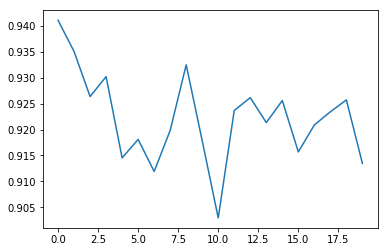

In [15]:
acc = []
for splits in range(20):
    false_acc = []
    trainx, testx, trainy, testy = train_test_split(transformed_x, y, test_size = 0.2, random_state = splits+1)
    scaled_trainx = ss.fit_transform(trainx)
    scaled_testx = ss.transform(testx)
    for depth in range(10):
        dtc = DecisionTreeClassifier(max_depth=depth+1, criterion='gini')
        scores = cross_val_score(dtc, scaled_trainx, trainy, cv = 10, scoring='roc_auc')
        false_acc.append(scores.mean())
    acc.append(sum(false_acc)/len(false_acc))
print(f'split = {acc.index(max(acc))+1}\nAverage acc = {max(acc)} ')
state = acc.index(max(acc))+1
plt.plot(acc)        

depth = 4
Average acc = 0.9634030045190686 


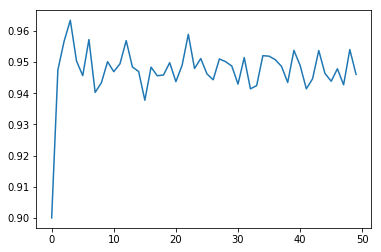

In [16]:
trainx, testx, trainy, testy = train_test_split(transformed_x, y, test_size = 0.2, random_state = state)
scaled_trainx = ss.fit_transform(trainx)
scaled_testx = ss.transform(testx)
acc = []
pred_acc = []
for depth in range(50):
    dtc = DecisionTreeClassifier(max_depth=depth+1, criterion='gini')
    scores = cross_val_score(dtc, scaled_trainx, trainy, cv = 10, scoring = 'roc_auc')
    acc.append(scores.mean())
print(f'depth = {acc.index(max(acc))+1}\nAverage acc = {max(acc)} ')
depth = acc.index(max(acc))+1
plt.plot(acc)
plt.plot(pred_acc)

In [17]:
dtc = DecisionTreeClassifier(max_depth=depth, criterion='gini')
dtc.fit(scaled_trainx, trainy)
print(f'training accuracy = {dtc.score(scaled_trainx, trainy)}')
print(f'testing accuracy = {dtc.score(scaled_testx, testy)}')

training accuracy = 0.9978021978021978
testing accuracy = 0.9385964912280702


In [18]:
y_pred = dtc.predict(scaled_testx)
#pd.DataFrame([y_pred, testy])
print(type(y_pred))
print(type(testy))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [19]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [20]:
print(classification_report(testy, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        72
           1       0.95      0.88      0.91        42

   micro avg       0.94      0.94      0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114
 samples avg       0.94      0.94      0.94       114



In [21]:
confusion_matrix(testy.values.argmax(axis = 1), y_pred.argmax(axis = 1))

array([[70,  2],
       [ 5, 37]])

In [22]:
#print((testy.values.argmax(axis = 1)))
#print(y_pred.argmax(axis = 1))
#print(testy.head(10))

In [23]:
pd.DataFrame(dtc.feature_importances_, index=transformed_x.columns)

,0
radius_mean,0.000000
texture_mean,0.007875
perimeter_mean,0.000000
area_mean,0.000000
smoothness_mean,0.000000
compactness_mean,0.000000
concavity_mean,0.007875
concave points_mean,0.029026
symmetry_mean,0.000000
fractal_dimension_mean,0.000000


# ---------------------------------------------------------------------------------

In [24]:
# all those which are incorrectly labelled
#column0 =y_pred, column1 = test_y
comp = pd.DataFrame([y_pred[:,1], testy.to_numpy()[:, 1]]).transpose()
comp.loc[comp[0] != comp[1]]

,0,1
7,0,1
72,0,1
76,0,1
77,0,1
95,0,1
111,1,0
112,1,0


In [25]:
pred_proba = dtc.predict_proba(scaled_testx)[1]
#pred_proba

In [26]:
 import sklearn 
# manipulating thresold
y_pred1 = sklearn.preprocessing.binarize(pred_proba, threshold=0.3)
#(y_pred1)
#print(testy)

In [27]:
y_pred2 = y_pred1.argmax(axis = 1)
#y_pred2

In [28]:
testy1 = testy.values.argmax(axis = 1)
#testy1

In [29]:
confusion_matrix(testy1, y_pred2)

array([[70,  2],
       [ 5, 37]])

In [30]:
print(f'The accuracy is: {(dtc.score(scaled_testx, testy))*100}%')

The accuracy is: 93.85964912280701%


In [31]:
tpr, fpr, thresolds = sklearn.metrics.roc_curve(testy1, y_pred2, pos_label=1)

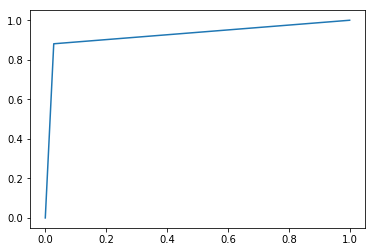

In [32]:
plt.plot(tpr, fpr)

In [33]:
thresolds

array([2, 1, 0])